In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

In [46]:
sns.set(rc={'figure.figsize':(30,15)})
# sns.set(rc={'figure.figsize':(16,8)})

In [47]:
# read in data
data = pd.read_csv('csv/daily-website-visitors.csv',parse_dates = ['Date'], thousands=',')

In [48]:
data=data[['First.Time.Visits','Date']]

In [49]:
data.head()

,First.Time.Visits,Date
0,1430,2014-09-14
1,2297,2014-09-15
2,2352,2014-09-16
3,2327,2014-09-17
4,2130,2014-09-18


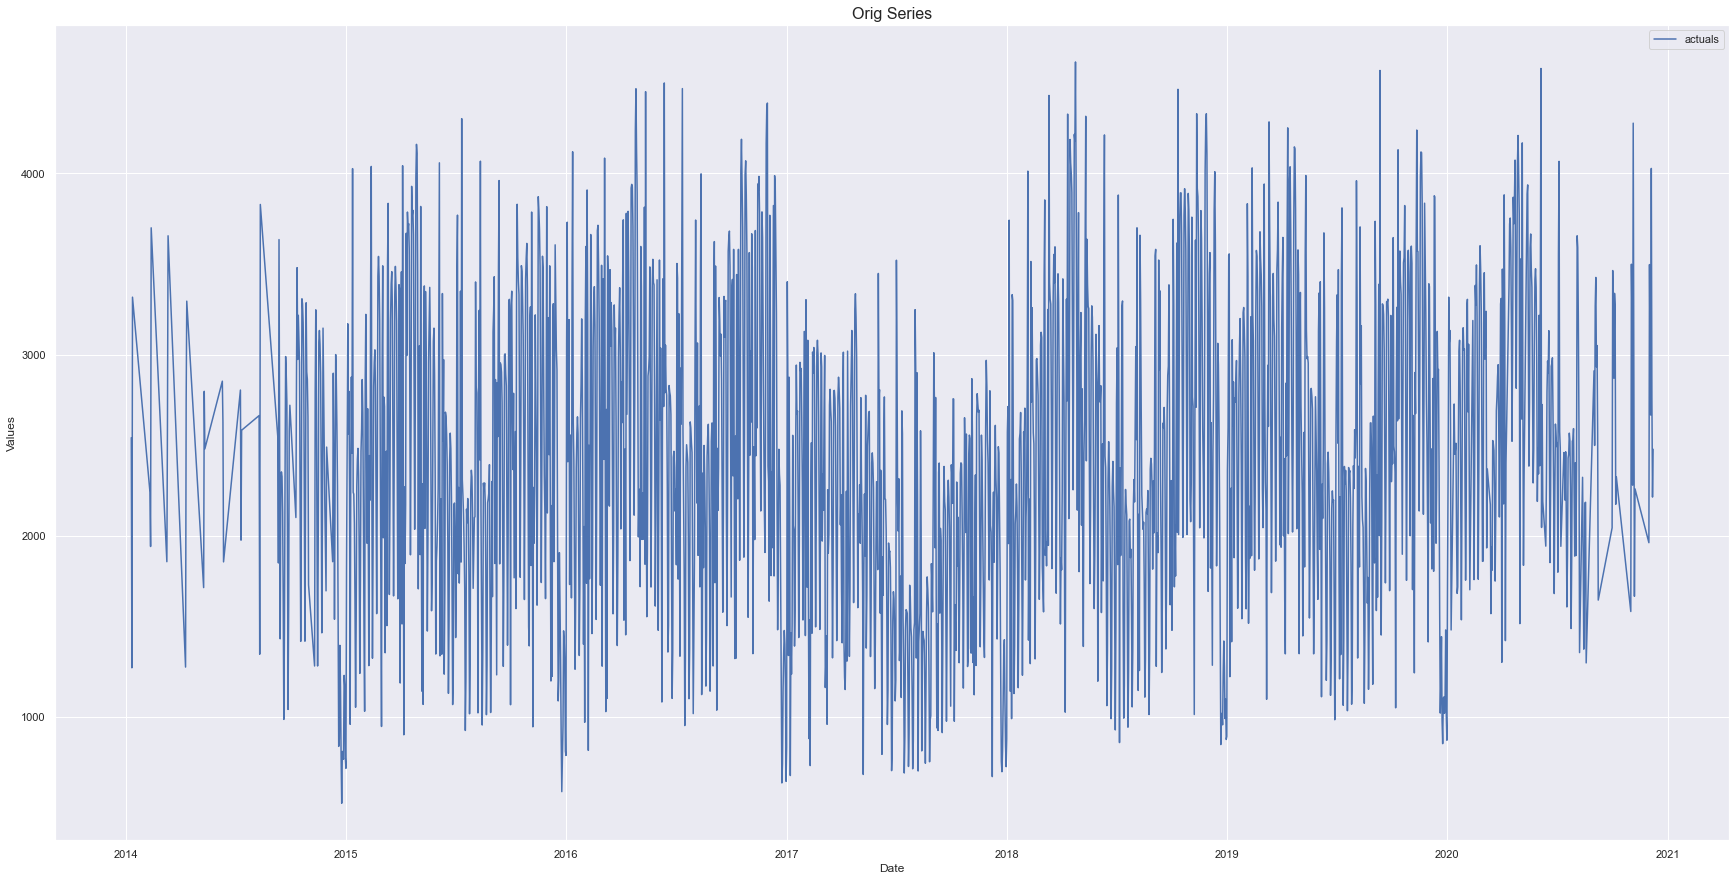

In [50]:
f=Forecaster(y=data['First.Time.Visits'],current_dates=data['Date'])
f.plot()
plt.title('Orig Series',size=16)
plt.show()

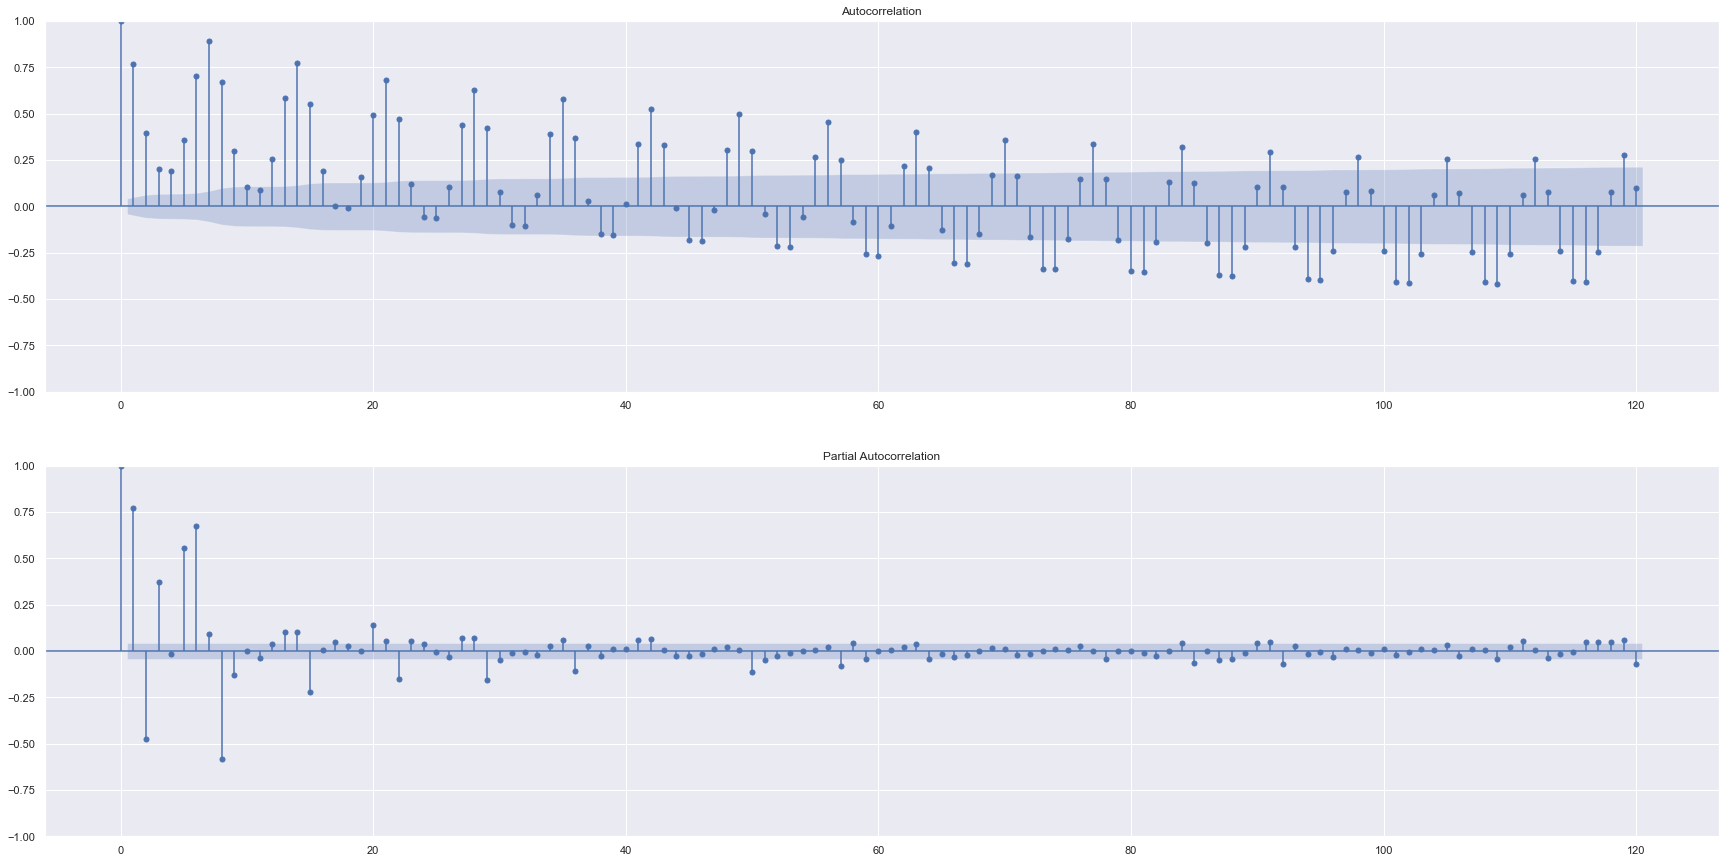

In [51]:
figs, axs = plt.subplots(2, 1)
f.plot_acf(ax=axs[0],lags=120)
f.plot_pacf(ax=axs[1],lags=120)
plt.show()

In [52]:
# f.seasonal_decompose().plot()
# plt.show()

In [53]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: -4.48
the p-value is 0.0002
the series is stationary
----------------------------------------------------------------------------------------------------


In [54]:
f.generate_future_dates(60)
f.set_test_length(.2)
f.set_estimator('prophet')
f

Forecaster(
    DateStartActuals=2014-09-14T00:00:00.000000000
    DateEndActuals=2020-08-19T00:00:00.000000000
    Freq=None
    N_actuals=2167
    ForecastLength=60
    Xvars=[]
    Differenced=0
    TestLength=433
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=prophet
)

In [55]:
f.manual_forecast(call_me='prophet1')

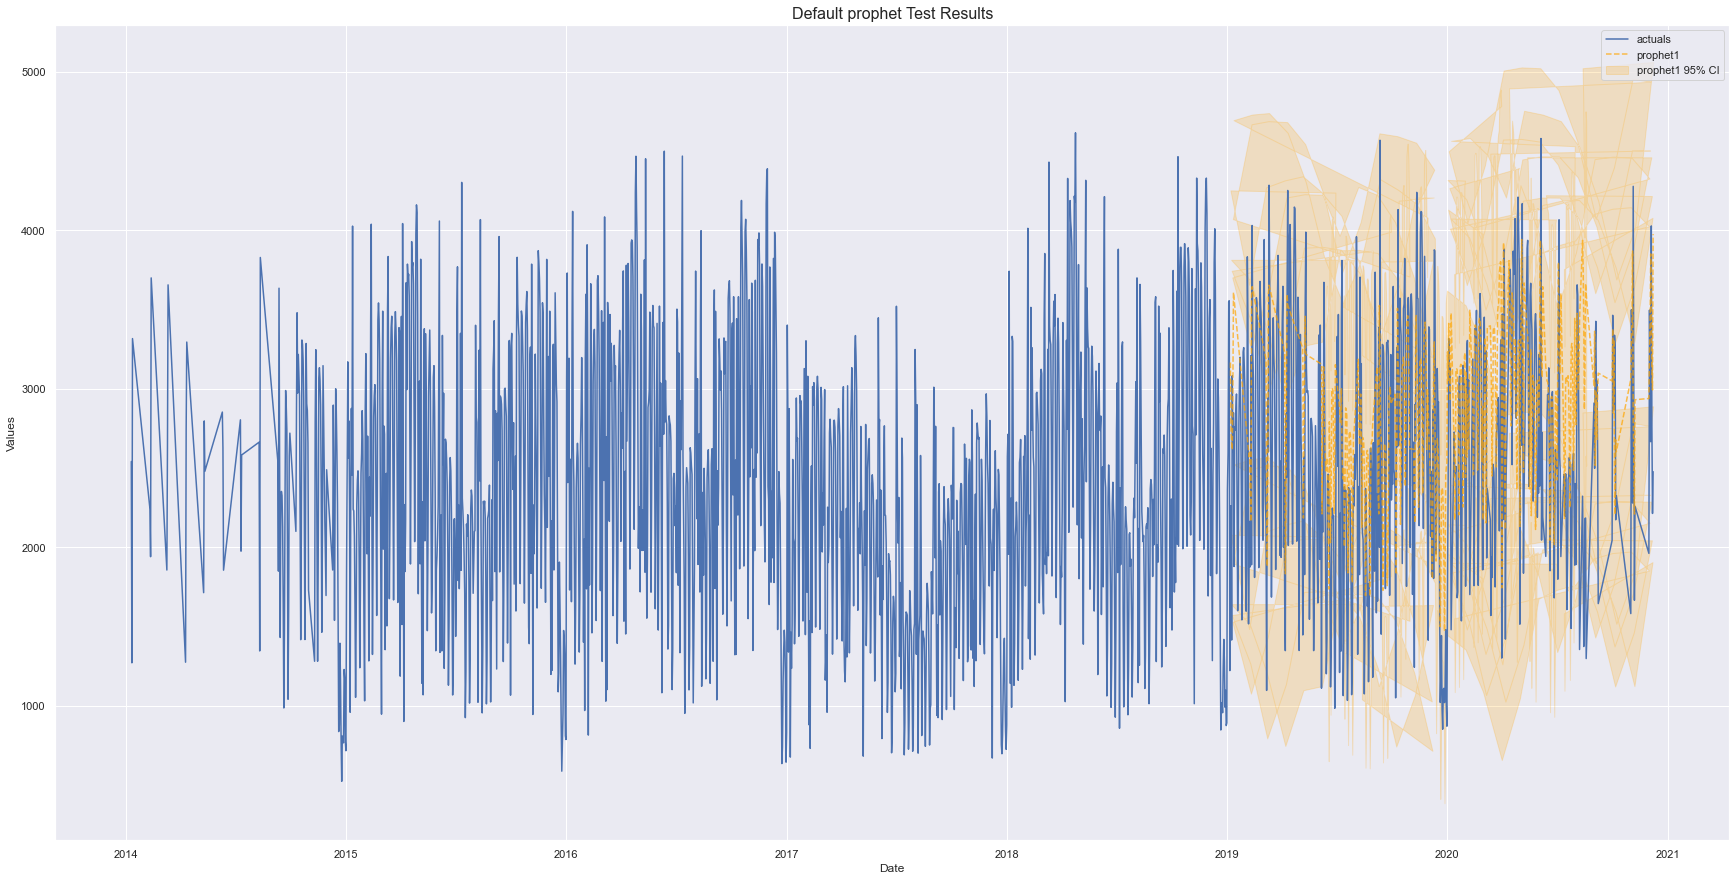

In [56]:
f.plot_test_set(ci=True,models='prophet1')
plt.title('Default prophet Test Results',size=16)
plt.show()

In [57]:
results = f.export('model_summaries')
results[['TestSetRMSE','InSampleRMSE','TestSetMAPE','InSampleMAPE']]

,TestSetRMSE,InSampleRMSE,TestSetMAPE,InSampleMAPE
0,846.659804,522.406636,0.344852,0.200056


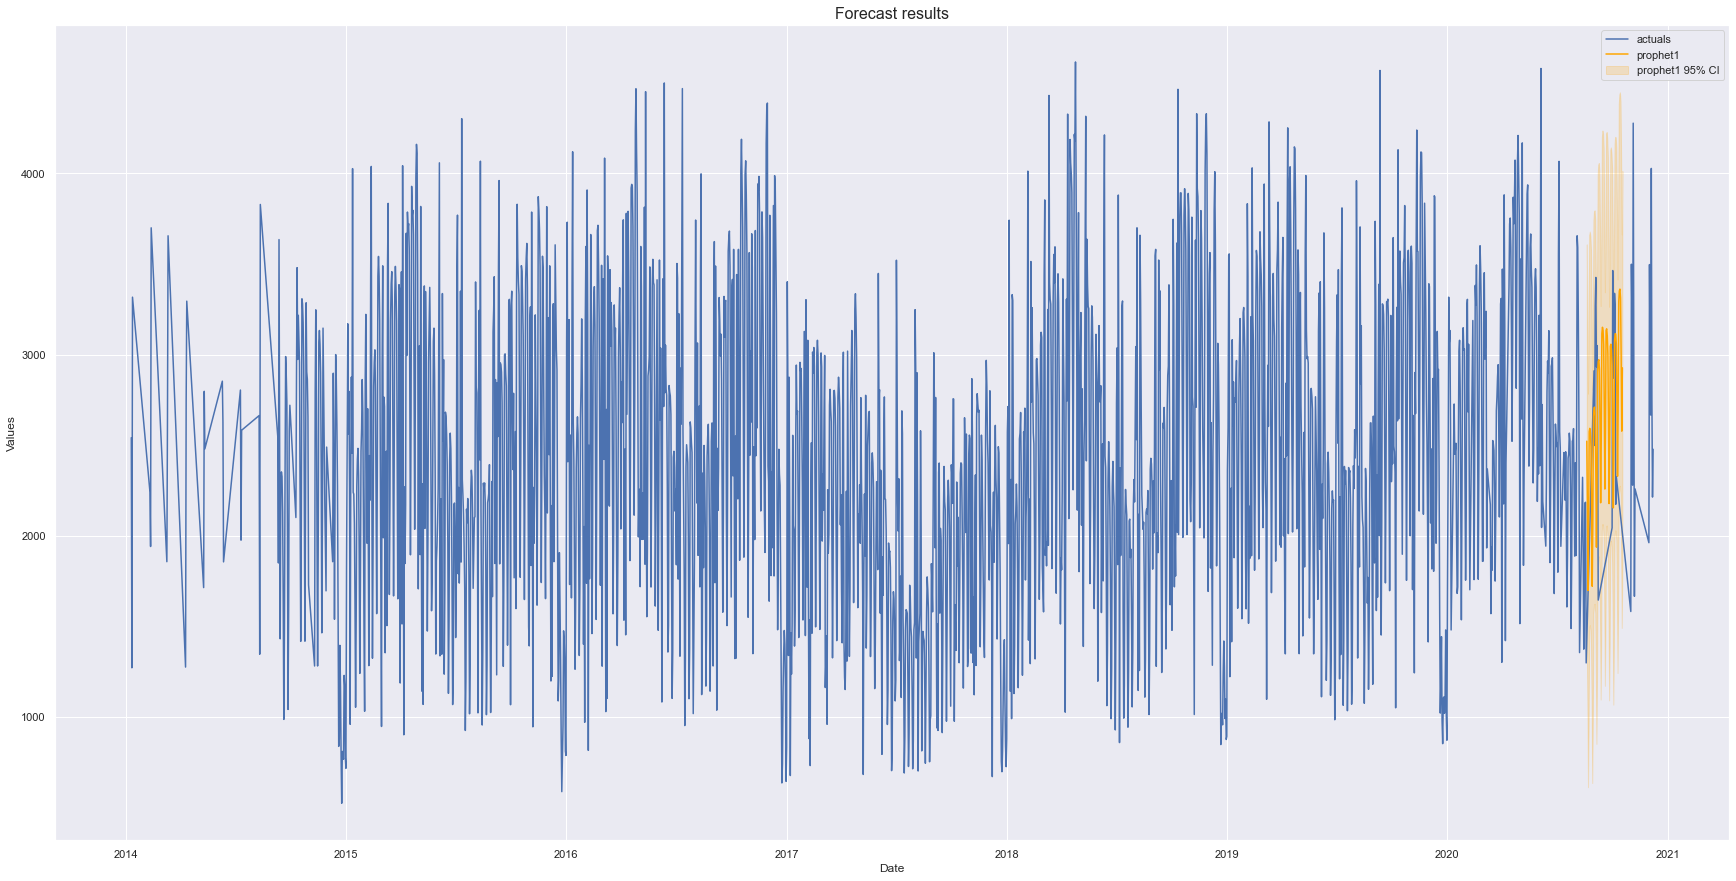

In [58]:
f.plot(ci=True,models='prophet1')
plt.title('Forecast results',size=16)
plt.show()